# <div align = "center">COSC 2673/2793 | Machine Learning</div>
<div align = "center"><font size="5">Assignment 2</font></div>
<div align = "center"><font size='4'>by David Aziz (s3825605) and Alistair Chitty (s3902003)</font></div>

# Loading Dataset & Exploratory Data Analysis

In [1]:
import zipfile
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
# Unzipping Traffic Sign Dataset
filename = "trafficsigns_dataset.zip"
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# initializing dicts to store sign-shapes and sign-types
data_dict = {}
data_dict["sign_shapes"] = list()
data_dict["sign_types"] = list()
data_dict["filename"] = list()

# iterate through trafficsigns_dataset folder:
for sign_shape in os.listdir("trafficsigns_dataset/"):
    folder = os.path.join("trafficsigns_dataset/", sign_shape)
    
    # iterate only through sign-shape folders
    if os.path.isdir(folder):
        for sign_type in os.listdir(folder):
            subfolder = os.path.join(folder, sign_type)
            
            # iterate only through sign-type subfolders
            if os.path.isdir(subfolder):
                for image in os.listdir(subfolder):  
                    if image.endswith(".png"):
                        data_dict["sign_shapes"].append(sign_shape)
                        data_dict["sign_types"].append(sign_type)
                        data_dict["filename"].append(image)

In [4]:
signs = pd.DataFrame.from_dict(data_dict)

In [5]:
signs.info() # getting info on the signs dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sign_shapes  3699 non-null   object
 1   sign_types   3699 non-null   object
 2   filename     3699 non-null   object
dtypes: object(3)
memory usage: 86.8+ KB


In [6]:
signs.head(5)

,sign_shapes,sign_types,filename
0,diamond,rightofway,00032_00000.png
1,diamond,rightofway,00032_00001.png
2,diamond,rightofway,00032_00002.png
3,diamond,rightofway,00037_00000.png
4,diamond,rightofway,00037_00001.png


In the below cells, we create histograms to visualize the frequency of the classes. We observe that there is a class imbalance, and we will need to account for this when we set up the evaluation framework for our developed models.

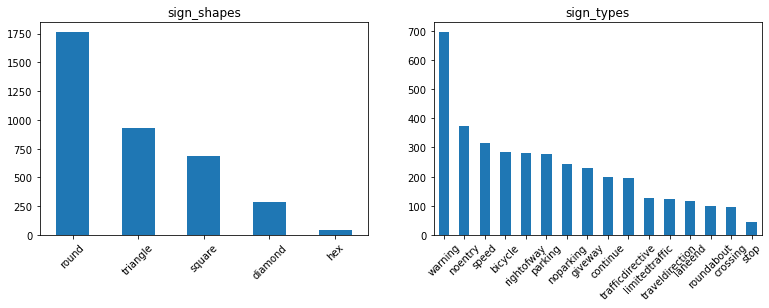

In [7]:
# checking distribution of classes for sign-shapes and sign-types
plt.figure(figsize = (20,18))

for i,col in enumerate(signs.iloc[:,0:2].columns):
    plt.subplot(4,3,i+1)
    signs[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation = 45)

In the below cells, we load in the images from the dataset folder as 1D NumPy arrays. All images are the same size (28x28), so we expect each image array to have 784 features. The images are grayscale, so we only expect 1 channel as well, with the values ranging from 0 to 255.

In [8]:
images = [] # initialize list to store image arrays

for index, row in signs.iterrows():
    folder,subfolder,image = row[0], row[1], row[2]
    img_path = os.path.join("trafficsigns_dataset/", folder, subfolder, image)
    img = np.asarray(Image.open(img_path)).flatten()
    images.append(img)
    
images = np.row_stack(images) # convert list of arrays into 2d array

In [9]:
print(f"This dataset has {images.shape[0]} images, and {images.shape[1]} features")

This dataset has 3699 images, and 784 features


The next step in EDA is to randomly sample a few images to visualize the information that we'll later feed into our classifers. To do this, we had to reshape the flattened image arrays into their original dimensions.

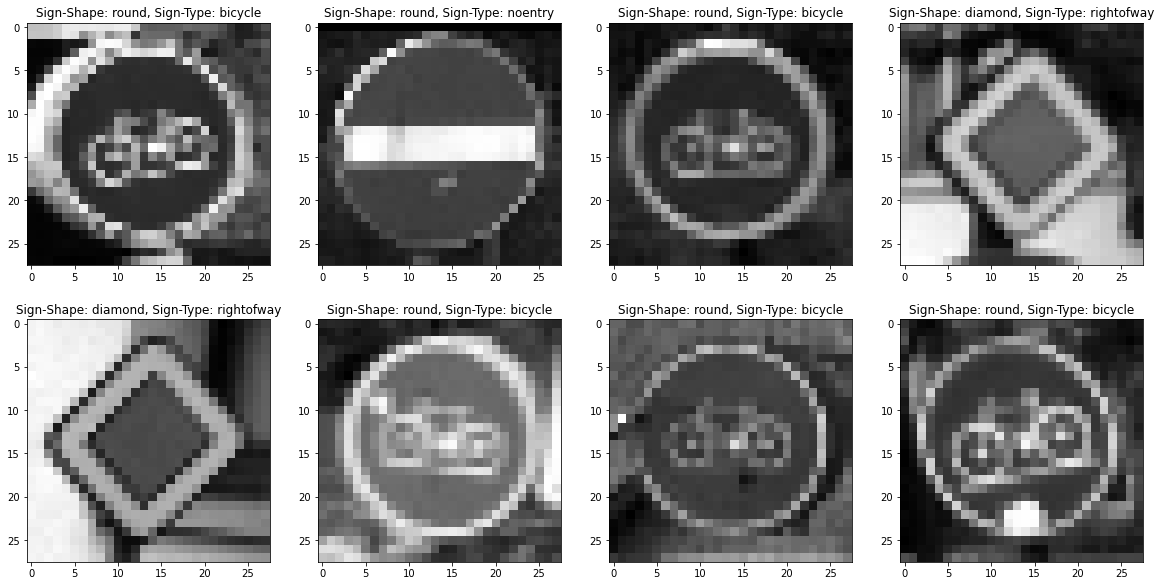

In [10]:
random.seed(0) # using seed to ensure reproducibility of image sample
plt.figure(figsize = (20,10))

num_imgs = 8 # setting size of sample
indices = random.sample(range(images.shape[1]),num_imgs)

for i,j in enumerate(indices):
    plt.subplot(2,4,i+1)
    plt.title(f"Sign-Shape: {signs.iloc[j,0]}, Sign-Type: {signs.iloc[j,1]}")
    plt.imshow(images[j].reshape(28,28), cmap = "gray")

In [12]:
pd.DataFrame(images).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,...,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000
mean,92.232225,92.712625,93.833469,93.676129,93.942687,94.065693,94.178967,94.504190,94.513923,94.978102,...,97.172209,97.173831,96.362530,95.297918,94.896999,94.149500,92.766153,90.021898,87.145174,86.069478
std,70.752777,71.652804,71.596326,71.431897,71.399424,71.235415,71.978231,72.163763,71.872867,71.936054,...,65.988030,66.955995,66.833096,67.025648,66.724743,66.934988,66.159849,65.192246,64.797119,64.946209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,7.000000,1.000000,3.000000,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000
25%,40.000000,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,40.000000,41.500000,...,47.000000,46.000000,45.000000,44.000000,44.000000,43.000000,44.000000,42.000000,40.000000,39.000000
50%,71.000000,70.000000,72.000000,72.000000,73.000000,73.000000,71.000000,71.000000,72.000000,72.000000,...,77.000000,76.000000,75.000000,73.000000,73.000000,72.000000,71.000000,69.000000,69.000000,67.000000
75%,127.000000,126.000000,127.000000,128.000000,128.000000,127.000000,128.500000,129.000000,130.000000,130.000000,...,132.000000,132.000000,130.000000,128.000000,128.000000,127.000000,123.000000,119.000000,113.000000,113.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In the above cell, we take the descriptive statistics of the images we loaded in. The min and max values for the pixels are within the range of 0 to 255 inclusive, confirming that we have loaded the data correctly, as well as highlighting the need for data normalization.

# Model Development